# Data Sampling for Computer Vision

*Author: Charles (Charlie) Rice for Break Through Tech*

---

It's an unfortunate truth that the computers and other digital tools we work with have upper bounds on their capabilities. Computers run out of RAM and hard disk space. Our AWS or Google Cloud account runs out of credits. But we still need to be able to work with large datasets, even when we cannot read the whole thing into memory.

# Learning objectives
By the end of this lesson, you will be able to:

1.   Explain the uses of sampling data
2.   Implement a simple workflow aimed at sampling image data


# Data Sampling
It's easy to forget that machine learning grew out of statistics, which itself is a field concerned in large part with figuring out whether a part (the sample) is truly representative of the whole (the population.)

The need for sampling data is not limited to the system constraints of machine learning. Sometimes we need to construct a pipeline and we simply need a subset of the data to test that the code runs properly. Sometimes we just need to run a simple check of our hypothesis before committing all the time and resources to a full and complete data analysis.







# Uniform Sampling
A deep understanding of sampling and sampling methods is beyond our purposes in this mini-lesson. We could indeed spend a great deal of time talking about the formulas and mathematical theories underlying good sampling.

Instead, we're going to stipulate that a uniform distribution (that is, each sample has an equal probability of being chosen) hits the right balance between informative data and system constraints, while helping to reduce some bias in the data.

Imagine a scenario where a dataset has three classes: "Cats", "Dogs", and "Birds". The classes, sadly, are imbalanced with "Cats" covering 10,000 images; "Dogs" covering 2,000 images; and "Birds" only covering 500 images.

If we used the full dataset, we would see significantly more Cats and Dogs than Birds, and way more Cats than either of the other two. Our model would learn what a cat looks like very well, but fall down on dogs and birds. Given the wealth of data we have, though, we have the option to take a smaller sample and artificially balance out our classes.

That does leave the question of how large a sample to draw from our total. This is a judgment call as much as anything else. Looking at our Cats, Dogs, Birds example, we know that the largest we can use is 500, which is the size of the smallest class. But that leaves us with no 'unseen' images that smallest class. Using just 100 images leaves us with plenty of images for validation later on, but may reduce the ability of our model to learn. Since we are working deliberately with a subset, we have room to explore and find out what works best given the constraints of our problem.

# Simple Image Sampling
Continuing with the example of "Cats", "Dogs", and "Birds, let's say that our images are already stored, keras-style, in directories containing the class labels.
```
main_directory/
...class_bird/
......bird_image_1.jpg
......bird_image_2.jpg
...class_cat/
......cat_image_1.jpg
......cat_image_2.jpg
...class_dog/
......dog_image_1.jpg
......dog_image_2.jpg
```

This assumption does make the process easier and highlights the importance of maintaining good organization at the data collection stage. That is, if you had scraped these images from the web, you would be very well served by using clear file and directory names. However, it is quite common (in fact, it is how most of the gold-standard datasets are built) to label images by hand.


In [ ]:
# os is the operating systems library for python
import os

# random will enable the randomness functions
import random

# tqdm creates a smart progress meter; useful for long processing jobs
from tqdm import tqdm

# Use Python Image Libary (PIL) to display images
from PIL import Image

We can use the os library and `listdir` to get the size by file count of each of our directories. Note that there isn't actually a dataset associated with this notebook yet, so executing the function inside will throw an error. The intention is to show you how to create a sampling function that can be used to work with a smaller subset of a larger set of images.

In [ ]:
def sample_files_from_directories(base_dir, sample_size_per_class):
    """
    Draws a uniform sample of filenames from directories, where each directory represents a class.

    Parameters:
        base_dir (str): The path to the base directory containing subdirectories.
        sample_size_per_class (int): The number of filenames to sample from each class directory.

    Returns:
        dict: A dictionary with class labels (directory names) as keys and lists of sampled filenames as values.
    """
    # Dictionary to store sampled filenames for each class
    sampled_files = {}

    # Iterate through each subdirectory ('class_dir') in the base directory ('base_dir')
    for class_dir in tqdm(os.listdir(base_dir), desc="Processing classes"):
        class_path = os.path.join(base_dir, class_dir)

        # Get all filenames in the current class directory
        filenames = os.listdir(class_path)

        # Check if there are enough files to sample from
        if len(filenames) < sample_size_per_class:
            print(f"Warning: Not enough files in class '{class_dir}' to sample {sample_size_per_class}. Using all available files.")
            sampled_files[class_dir] = filenames
        else:
            # Randomly sample files from the current class directory
            sampled_files[class_dir] = random.sample(filenames, sample_size_per_class)

    return sampled_files


Let's test the function on the [Cats and Dogs data](https://www.google.com/url?q=https%3A%2F%2Fwww.microsoft.com%2Fen-us%2Fdownload%2Fdetails.aspx%3Fid%3D54765) from Microsoft. We'll pull down the full dataset into Colab, but only use 100 images from each class. (Unfortunately, there is no cats, dogs, birds dataset readily available, but the code is extensible to any number of class labels.)

In [ ]:
## Uncomment the line below and run it.
# !curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   116M      0  0:00:06  0:00:06 --:--:--  116M


In [ ]:
## Uncomment the lines below and run them
# !unzip -q kagglecatsanddogs_5340.zip
# !ls

 CDLA-Permissive-2.0.pdf   kagglecatsanddogs_5340.zip   PetImages  'readme[1].txt'   sample_data


Now we execute our function, saving the resulting dictionary to the variable `sample`.

In [ ]:
sample = sample_files_from_directories("PetImages", 100)

Processing classes: 100%|██████████| 2/2 [00:00<00:00, 74.73it/s]


So far, it seems to have executed correctly.

In [ ]:
sample.keys()

dict_keys(['Cat', 'Dog'])

In [ ]:
len(sample['Cat'])

100

And we should probably do a spot check to make sure that the labels are correct.

In [ ]:
spot = sample['Cat'][0]

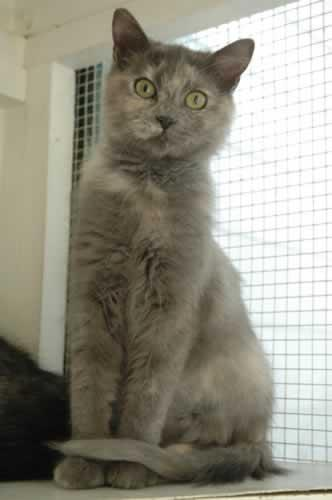

In [ ]:
img = Image.open('PetImages/Cat/' + spot)
img

We probably want to move our samples out of the main directory, or at least copy them to make sure they are in one place. (Using tqdm in this particular instance is probably excessive, but in general it's a very helpful tool.)

In [ ]:
def copy_sampled_files(base_dir, sampled_files):
    """
    Copies sampled files into new directories named 'sample_{class_name}' inside the base directory.

    Parameters:
        base_dir (str): The path to the base directory containing class directories.
        sampled_files (dict): A dictionary with class labels as keys and lists of sampled filenames as values.
    """
    for class_label, files in tqdm(sampled_files.items(), desc="Copying sampled files"):
        # Create the target directory for the sampled files
        sample_dir = os.path.join(base_dir, f"sample_{class_label}")
        os.makedirs(sample_dir, exist_ok=True)

        # Copy each sampled file to the target directory
        for file_name in files:
            src_path = os.path.join(base_dir, class_label, file_name)
            dest_path = os.path.join(sample_dir, file_name)

            try:
                if os.path.isfile(src_path):
                    with open(src_path, 'rb') as src_file:
                        with open(dest_path, 'wb') as dest_file:
                            dest_file.write(src_file.read())
            except Exception as e:
                print(f"Error copying file {file_name} from class {class_label}: {e}")

And we can now execute...

In [ ]:
copy_sampled_files("PetImages", sample)

Copying sampled files: 100%|██████████| 2/2 [00:00<00:00, 81.50it/s]


In [ ]:
os.listdir("PetImages/")

['Cat', 'sample_Cat', 'sample_Dog', 'Dog']

And there we have it! It's a quick, uniform sampling of a much, much larger dataset. Using the smaller sample we can work much more readily with the image data in the earlier or exploratory stages, and possibly even build a simple image classifier. We would do this to save on system resources, time, and even just to spot check that our initial ideas are working correctly before investing all the time and effort that goes into a full machine learning process.